In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import cm

from scipy.stats import multivariate_normal
from matplotlib.ticker import NullFormatter
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set()

In [3]:
# Génère une fonction de distribution normale des probabilités en 3D 

# Génération d'un grillage (x,y) pour lequel la fonction sera calculée en tout point
N = 60
X = np.linspace(-4, 4, N)
Y = np.linspace(-4, 4, N)
X, Y = np.meshgrid(X, Y)

pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

# Paramètres de la distribution normale
mu = np.array([0., 0.])
Sigma = np.array([[ 1. , -0.5], [-0.5,  1.5]])

F = multivariate_normal(mu, Sigma)
Z = F.pdf(pos)


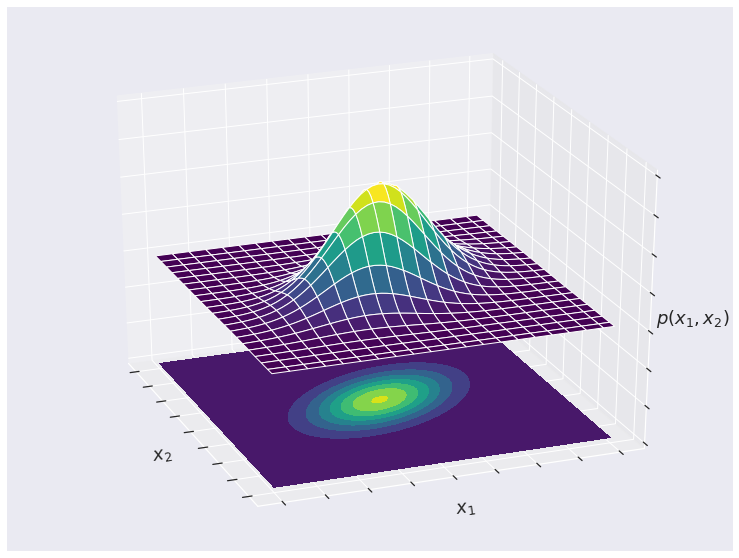

In [4]:
# Affiche la fonction de distribution normale des probabilités en 3D et ses contours en 2D

fig = plt.figure(figsize = (13,10))
ax = fig.gca(projection='3d')

# Surface 3D au dessus
ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True, cmap=cm.viridis)

# Contours 2D remplis en dessous
cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.viridis)

ax.set_zlim(-0.15,0.2)
ax.view_init(27, -21)

# Enlève ticklabels
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
ax.zaxis.set_major_formatter(NullFormatter())
            
ax.set_ylabel('$x_{1}$', fontsize=18)
ax.xaxis.set_rotate_label(False)  
ax.set_xlabel('$x_{2}$', rotation=10, fontsize=18)
ax.zaxis.set_rotate_label(False)  
ax.set_zlabel('$p(x_{1},x_{2})$', rotation=0, fontsize=18)

plt.savefig("Figure_8_41.svg", format="svg")

plt.show()